## Illustration of GP Regression with GPy

In [1]:
import GPy
import numpy as np
from math import sin

## Set Up Data
1. X is regular grid of 100 points in [0,1]
2. $Y = \exp^{0.001*x} + sin(x) + \mathcal{N}(0, 0.01)$

In [2]:
x = np.linspace(0,1, 100)
y  = np.exp(0.001*x)  + np.sin(x) + np.random.normal(0, 0.01, 100)
x = np.reshape(x, (x.shape[0], 1))
y = np.reshape(y, (y.shape[0],1))

## Create Training and Test Data

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

## Setup GP Regression

In [4]:
k = GPy.kern.RBF(input_dim = 1)

In [5]:
m = GPy.models.GPRegression(X_train, y_train, k)

## Before Model Optimization 

In [6]:
print(m)


Name : GP regression
Objective : 66.1476999924
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


In [7]:
m.optimize()

### Note:
The log likelihood of the training data is maxmimized to determine model parameters

In [8]:
print(m)


Name : GP regression
Objective : -208.796460035
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |      2.916036118652266  |      +ve      |        
  rbf.lengthscale          |     2.6837841403970444  |      +ve      |        
  Gaussian_noise.variance  |  7.286061906166007e-05  |      +ve      |        


In [9]:
yp = m.predict(X_test)[0]

In [10]:
import matplotlib
from matplotlib import pyplot as plt
% matplotlib inline

Text(0.5,0,'Y test')

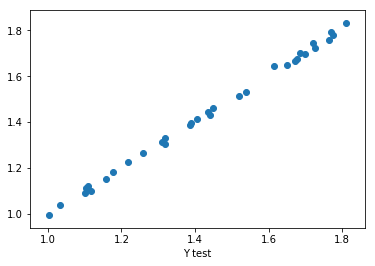

In [11]:
plt.scatter(y_test, yp)
plt.xlabel("Y test")